<a href="https://colab.research.google.com/github/Nunikyuni/us_covid19_daily_regression/blob/main/UTS_Machine_Learning__Ni_Nyoman_Wahyuni_Indraswari_(F1D018047).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<li> Nama  : Ni Nyoman Wahyuni Indraswari </li> 
<li> NIM   : F1D018047 </li> 
<li> Kelas : Machine Learning B </li>

<pre>
Carilah dataset real, bebas dari internet dengan ketentuan sbb:

jumlah total atribut lebih dari 5
minimal jumlah data adalah 100 data
dapat digunakan untuk pemodelan Regresi
Kemudian, lakukan beberapa hal berikut:

1 tentukan variable dependent dan independent dari dataset
2 lakukan eksplorasi dan visualisasi data
3 lakukan data analisis dan juga pengecekan serta pembersihan data dari outlier dan missing data jika diperlukan
4 lakukan pemodelan regresi (linear dan berganda) dan seleksi fitur dengan korelasi agar mendapatkan atribut (variable independent) yang baik untuk digunakan pada model regresi
5 analisa dan jelaskan hasil evaluasi pemodelan regresi
6 lakukan pemodelan dengan regresi logistik dengan data yang sama dengan cara mentransformasikan variable dependent yang awalnya
  bernilai continue menjadi categorical (hint: Gunakan Binning Data in Pandas).
  Contoh: variable dependent harga mobil (bernilai continue) ditransformasikan menjadi harga model Mahal dan Murah (untuk 2 kelas)
  dan Mahal, Sedang, Murah (untuk 3 kelas)
7 analisa dan jelaskan hasil evaluasi pemodelan regresi logistik

Ketentuan yang harus dikumpulan adalah sebagai berikut: 
1 Source dalam format file jupiter notebook (.ipynb) lengkap dengan dataset.
2 Pengumpulan source code juga dapat dilakukan melalui git repository (Github/Gitlab) dengan melampirkan link menuju public
  repository pada assigment Berajah.
3 Video presentasi sederhana (tidak perlu banyak edit  seperti tambah efek suara atau animasi, karena video tidak masuk penilaian
  mengenai penjelasan source code dan hasilnya.
4 Durasi video minimal 4 menit dan maksimal 10 menit. Suara video harus terdengar dengan jelas dan menampilkan wajah dari presentasi
  Rekomendasi: Gunakan Aplikasi Zoom Free untuk record video, karena ada 40 Menit record zoom meeting mandiri untuk akun free)
5 Video di upload di kanal Youtube ataupun platform lainnya (Contoh: google drive), kemudian cukup melampirkan link menuju video saja.
6 Batas waktu pengumpulan sebelum 25 April 2021.

In [1]:
#import library
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics               
from scipy import stats
# we are using this for model tunning

from warnings import filterwarnings
filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv('us_covid19_daily.csv', usecols = ['states',
                                                         'positive',
                                                        'negative',
                                                        'hospitalizedCumulative',
                                                        'death',
                                                        'hospitalized',
                                                        'deathIncrease',
                                                        'negativeIncrease', 
                                                        'positiveIncrease',
                                                        'totalTestResultsIncrease'])
dataset.head()

,states,positive,negative,hospitalizedCumulative,death,hospitalized,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,56,14534035,161986294,585676.0,273374.0,585676.0,1138,1172590,176771,1634532
1,56,14357264,160813704,583420.0,272236.0,583420.0,2445,1526995,211073,2169756
2,56,14146191,159286709,580104.0,269791.0,580104.0,2563,1260657,224831,1854869
3,56,13921360,158026052,575452.0,267228.0,575452.0,2706,1238465,210204,1828230
4,56,13711156,156787587,570121.0,264522.0,570121.0,2733,982032,195796,1459202


In [3]:
#cek info dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   states                    320 non-null    int64  
 1   positive                  320 non-null    int64  
 2   negative                  320 non-null    int64  
 3   hospitalizedCumulative    278 non-null    float64
 4   death                     301 non-null    float64
 5   hospitalized              278 non-null    float64
 6   deathIncrease             320 non-null    int64  
 7   negativeIncrease          320 non-null    int64  
 8   positiveIncrease          320 non-null    int64  
 9   totalTestResultsIncrease  320 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 25.1 KB


In [4]:
dataset['states'].unique()

array([56, 51, 39, 30, 24, 13, 11, 10,  7,  5,  4,  3,  2])

In [5]:
dataset.describe()

,states,positive,negative,hospitalizedCumulative,death,hospitalized,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
count,320.000000,3.200000e+02,3.200000e+02,278.000000,301.000000,278.000000,320.000000,3.200000e+02,320.000000,3.200000e+02
mean,48.853125,3.963366e+06,4.707150e+07,276808.104317,122746.139535,276808.104317,854.293750,5.062072e+05,45418.859375,6.376996e+05
std,17.519724,3.837424e+06,4.863156e+07,160875.737479,82559.099864,160875.737479,654.573738,3.888724e+05,45243.105210,5.215503e+05
min,2.000000,0.000000e+00,0.000000e+00,4.000000,0.000000,4.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,56.000000,5.243978e+05,2.177519e+06,158522.750000,50175.000000,158522.750000,352.000000,1.189028e+05,20310.250000,1.513970e+05
50%,56.000000,2.600174e+06,2.954071e+07,276369.000000,125464.000000,276369.000000,859.000000,5.566565e+05,34292.500000,6.456460e+05
75%,56.000000,6.624805e+06,8.293463e+07,397899.250000,192826.000000,397899.250000,1195.000000,7.581605e+05,56288.250000,9.562088e+05
max,56.000000,1.453404e+07,1.619863e+08,585676.000000,273374.000000,585676.000000,2752.000000,1.941714e+06,224831.000000,2.340996e+06


<h1>INDEPENDENT and DEPENDENT VARIABEL</h1>

**Independent Variabel  :**

States

Positive

Negative

HospitalizedCumulative

Death

Hospitalized

DeathIncrease

NegativeIncrease

PositiveIncrease

MonthChecked

**Dependent Variabel  :**

TotalTestResultsIncrease


<h1>VISUALIZATION and EXPLORATORY DATA</h1>


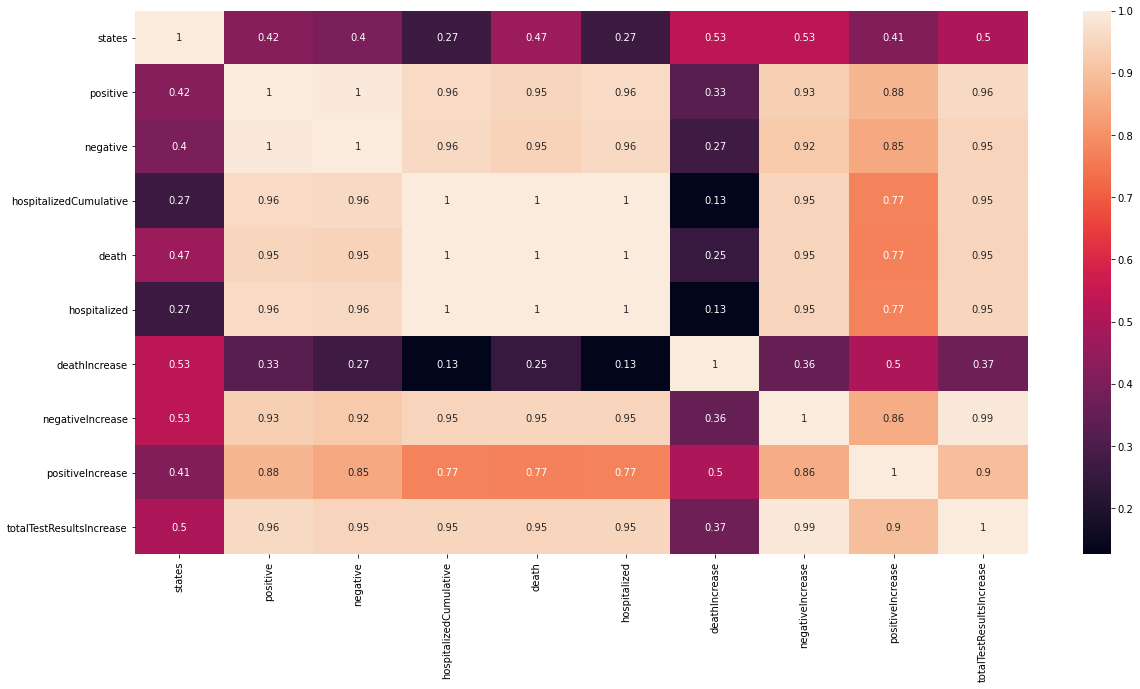

In [6]:
#correlation visualization
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(),annot=True)
plt.ioff()

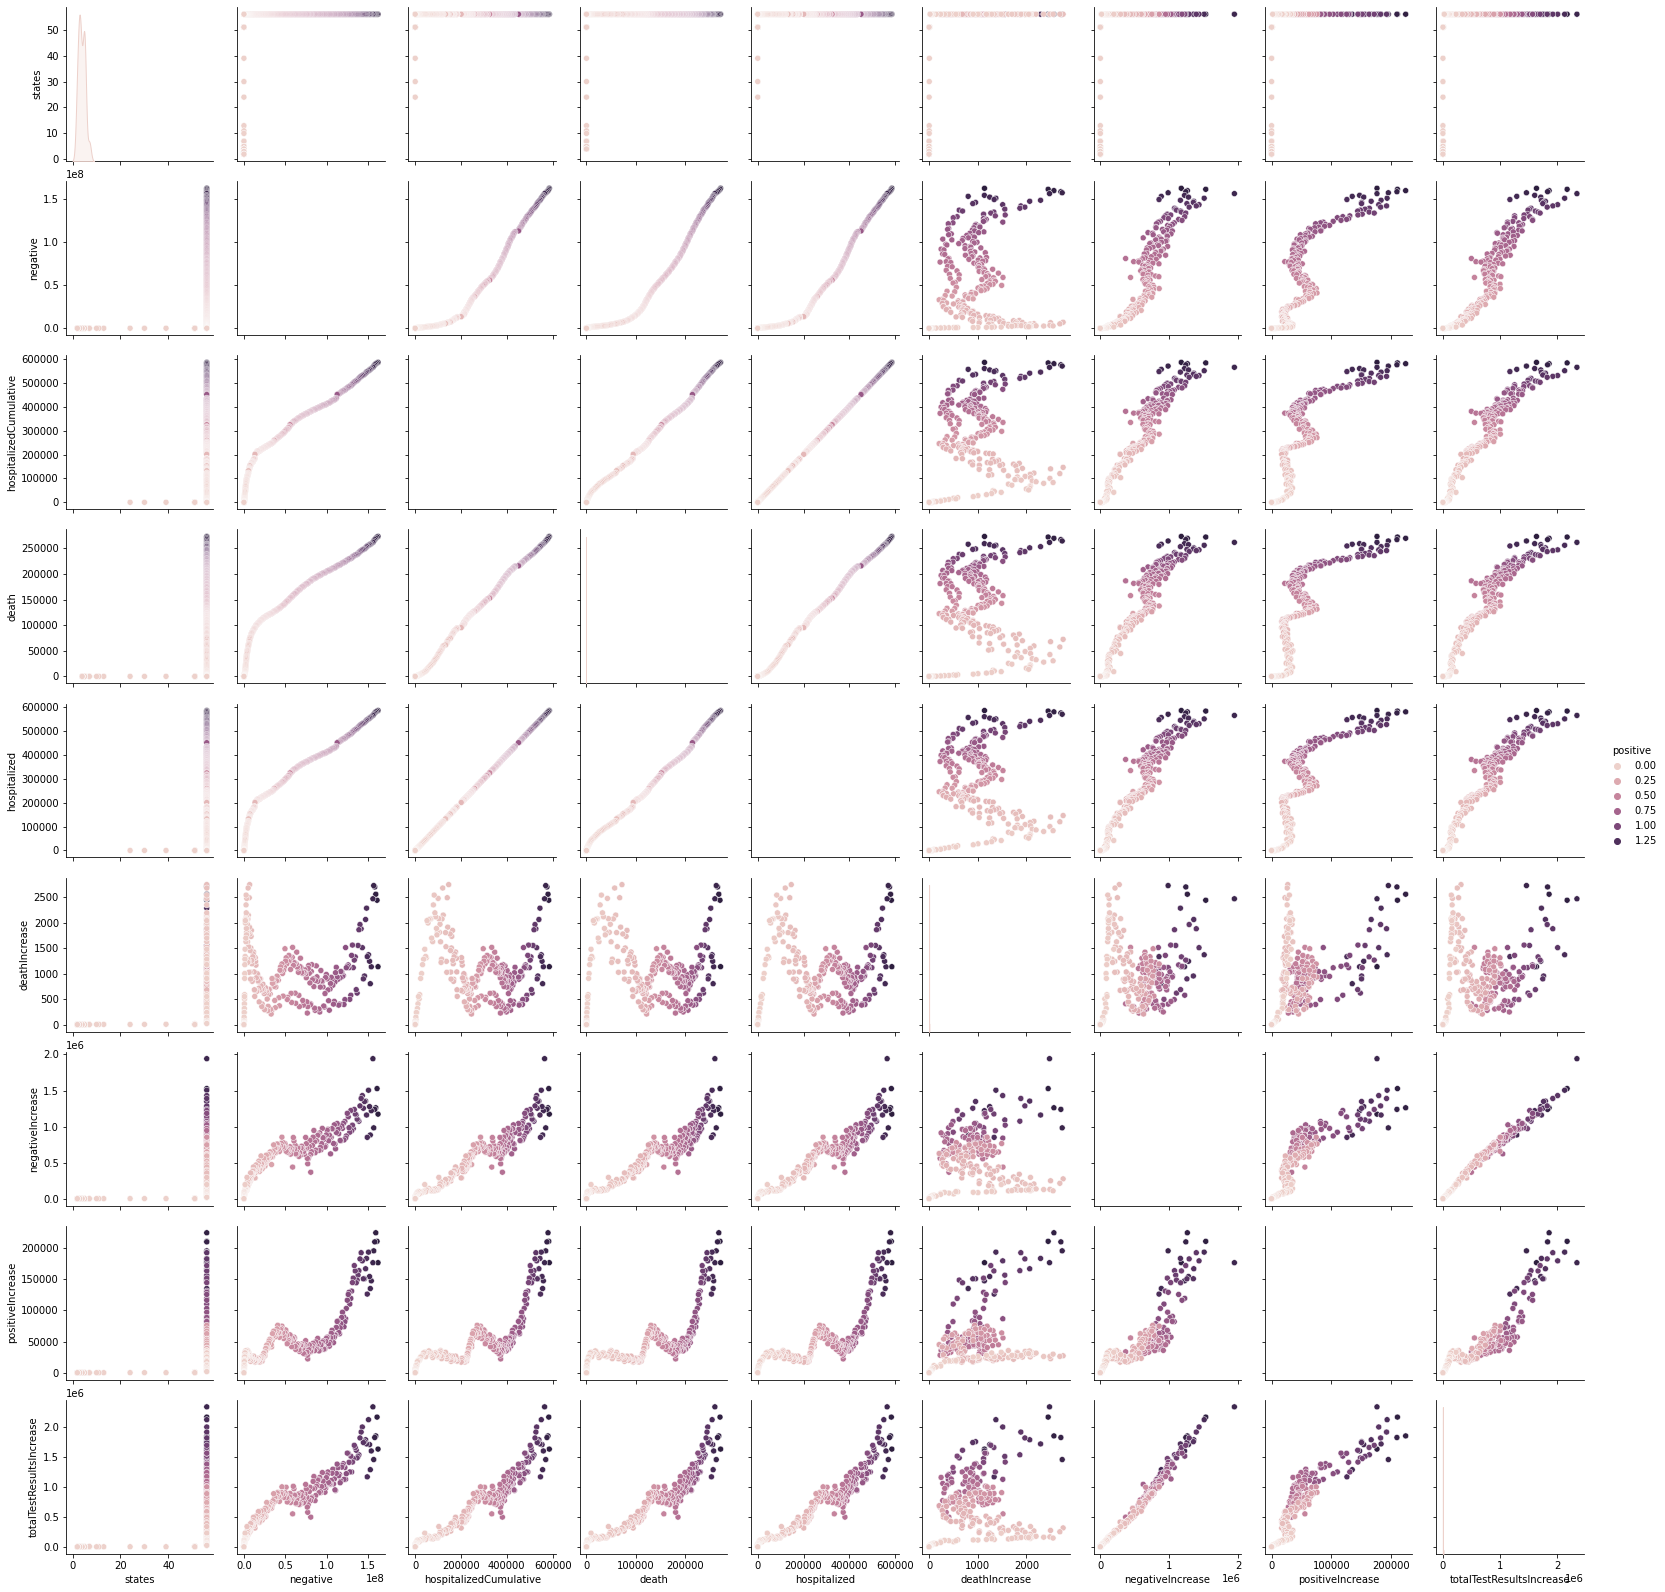

In [7]:
#corelation between variabel based on positive
sns.pairplot(dataset, hue ="positive")

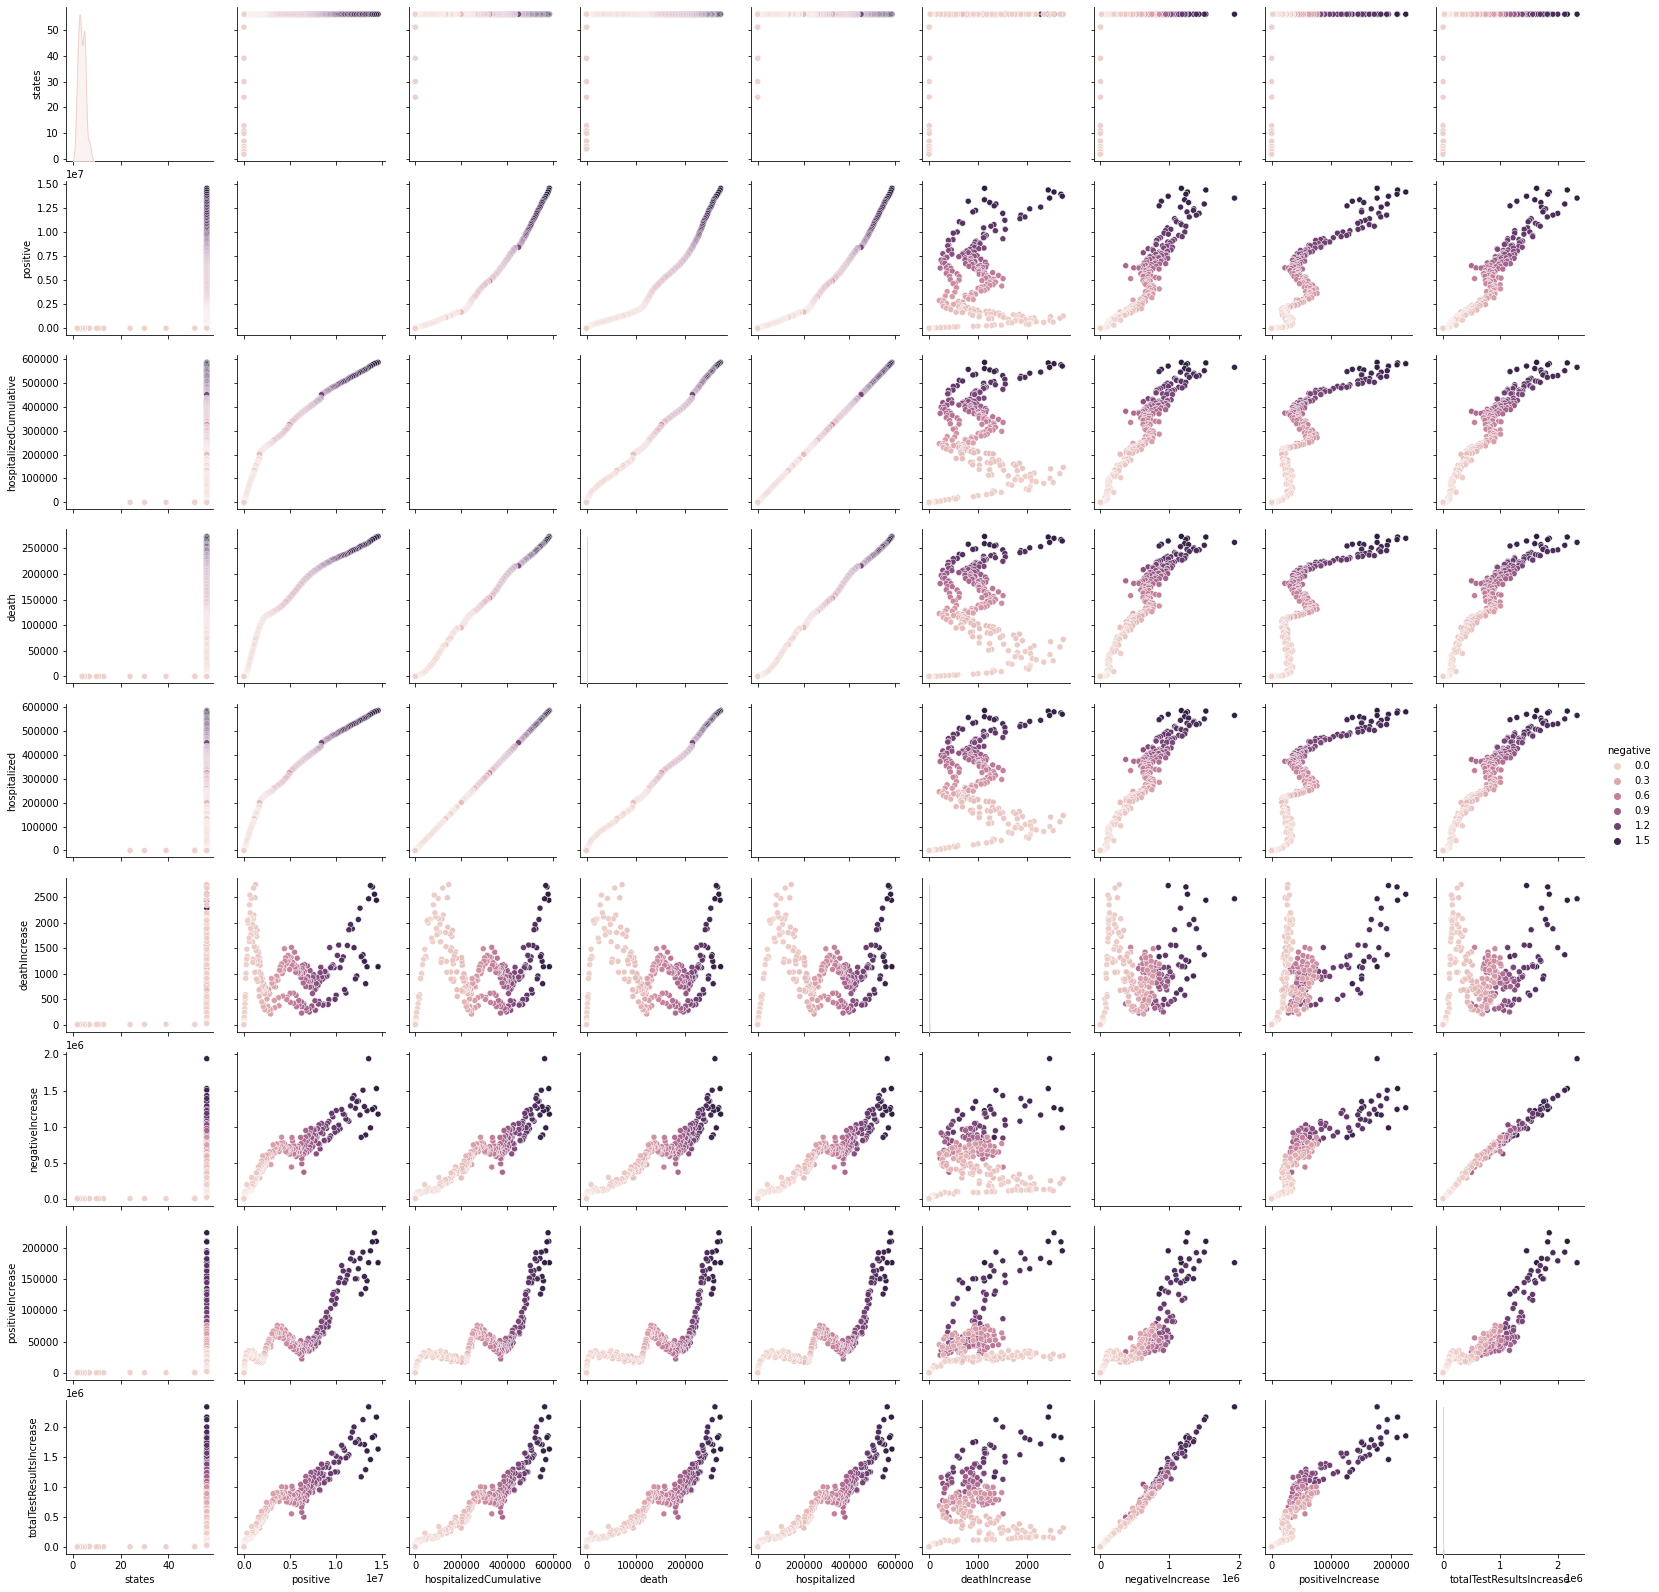

In [8]:
#corelation between variabel based on negative
sns.pairplot(dataset, hue ="negative")

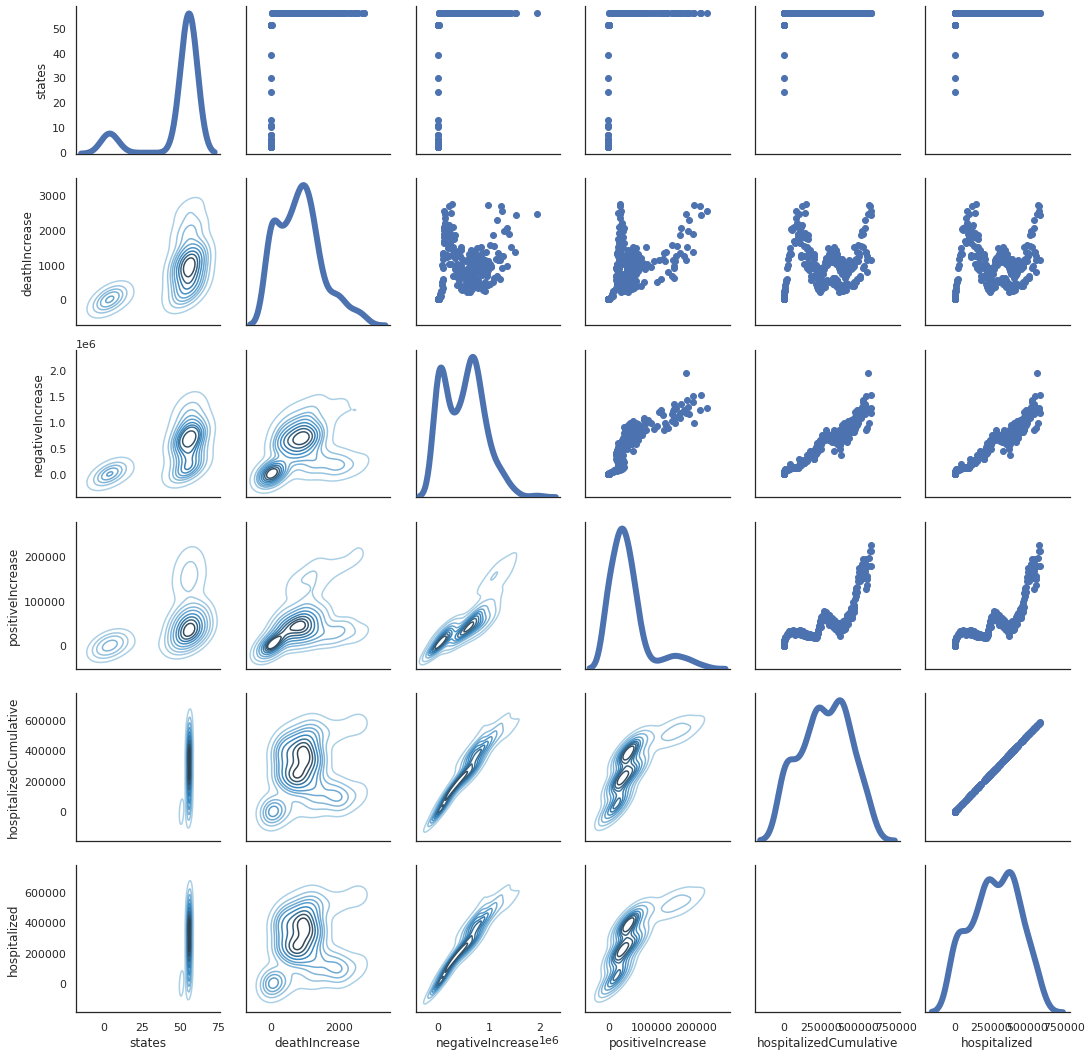

In [9]:
#correlation variabel based on 'states','deathIncrease','negativeIncrease','positiveIncrease','hospitalizedCumulative','hospitalized' 
sns.set(style="white")
df = dataset.loc[:,['states','deathIncrease','negativeIncrease','positiveIncrease','hospitalizedCumulative','hospitalized']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d", figsize=(18, 15))
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=6)

<Figure size 1800x3600 with 0 Axes>

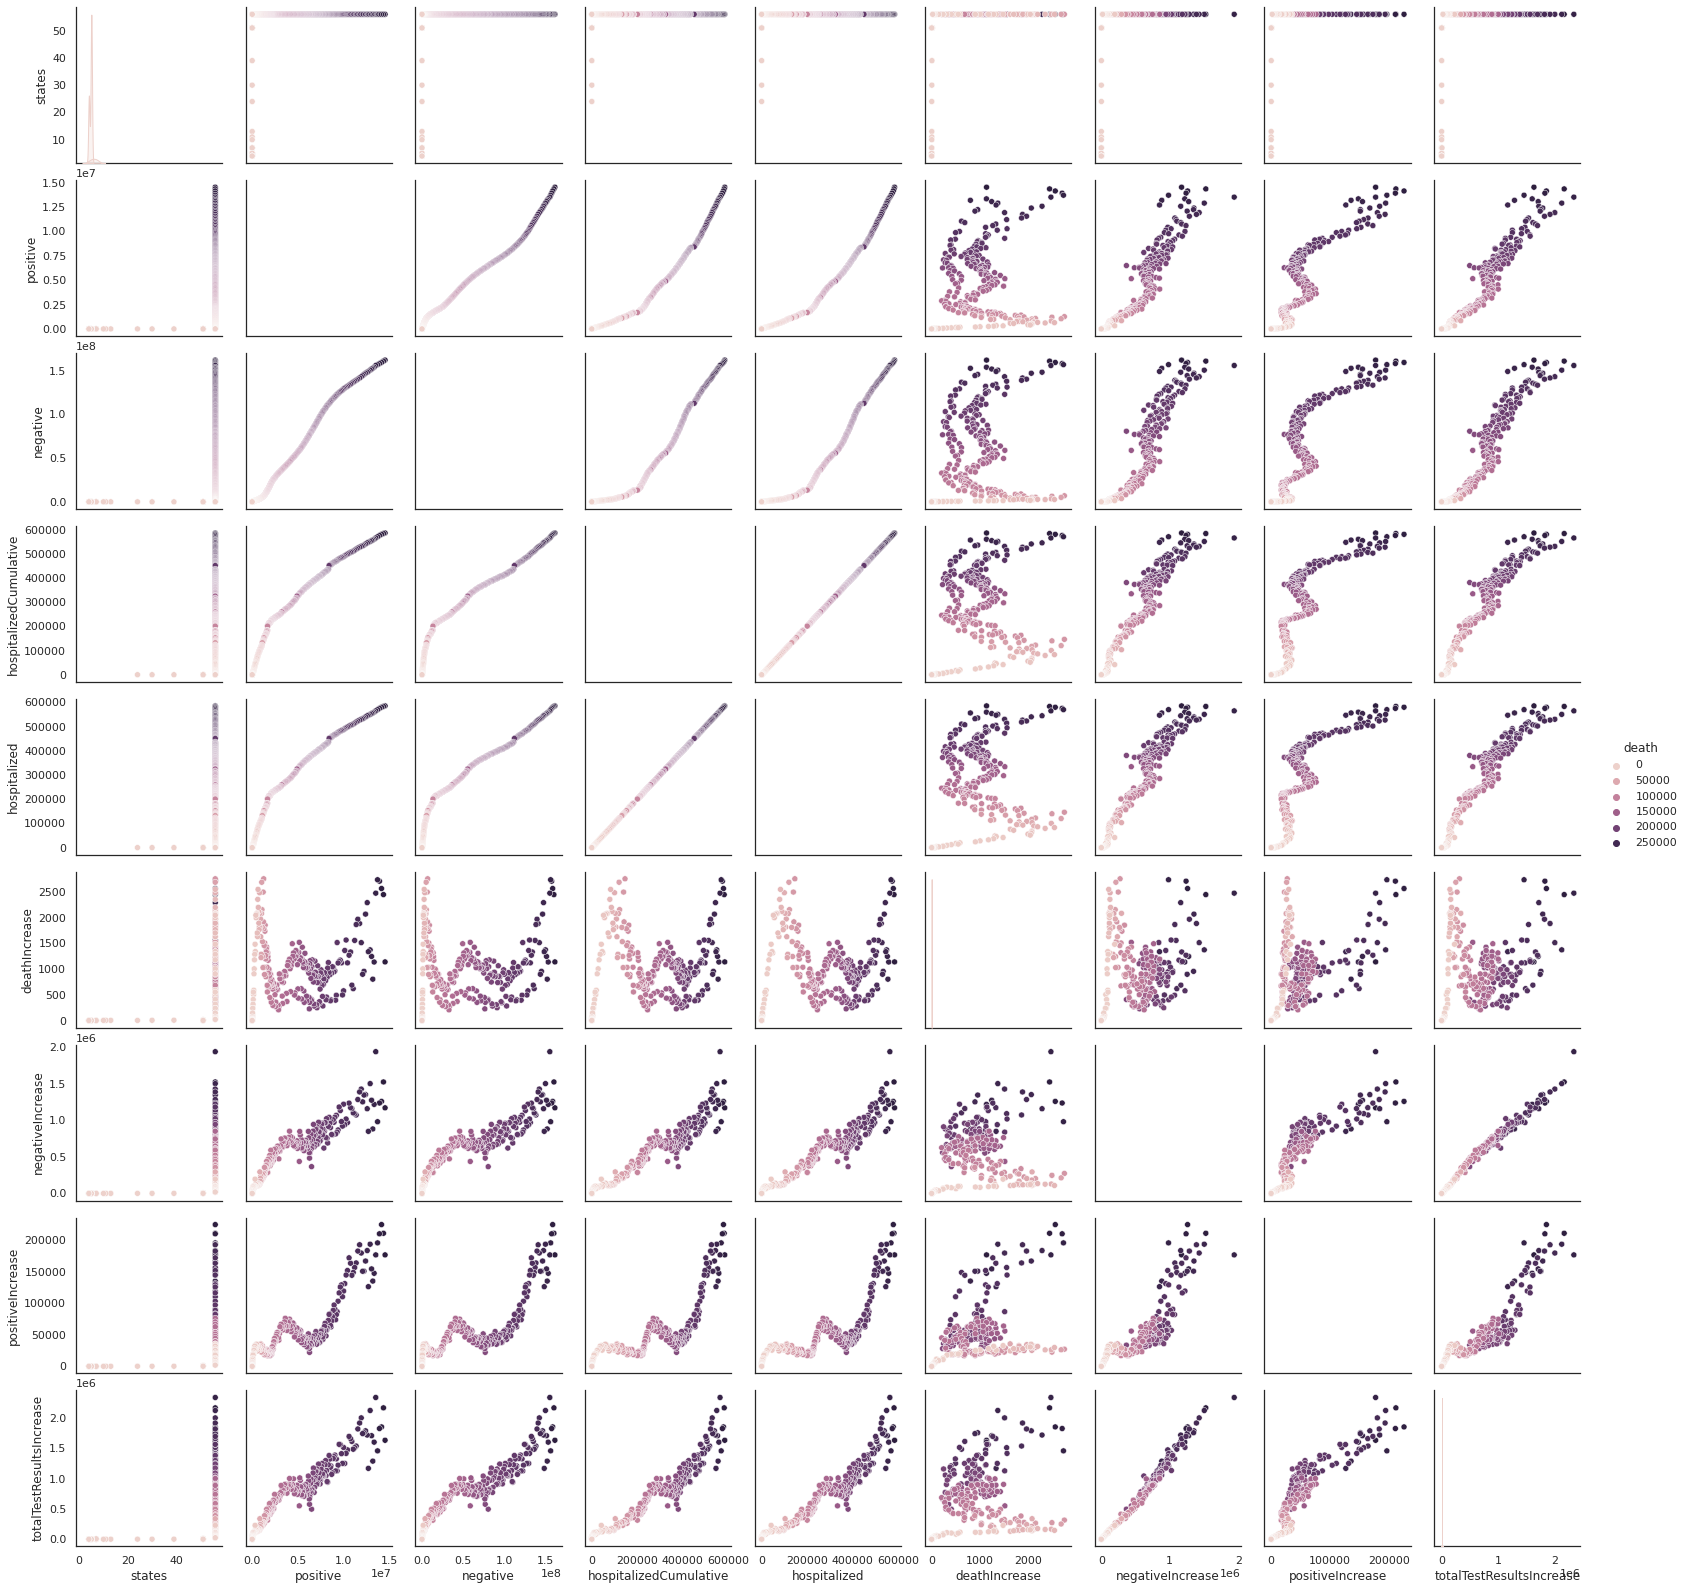

In [10]:
#correlation variabel based on death
plt.figure(figsize=(25,50))
sns.pairplot(dataset, hue = 'death')
plt.show()

<h1>REMOVE OUTLIER</h1>

{'boxes': [<matplotlib.lines.Line2D at 0x7f589007be90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5890083ed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f589008bf10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f589008b9d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5890083450>,
  <matplotlib.lines.Line2D at 0x7f5890083990>]}

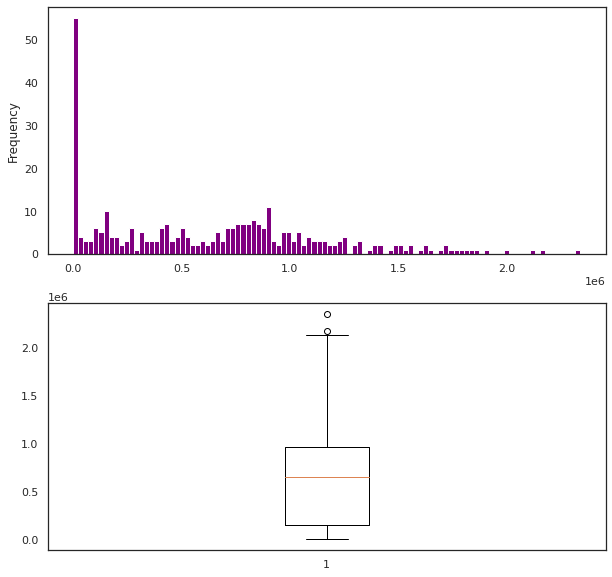

In [11]:
#Find outlier
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
dataset['totalTestResultsIncrease'].plot(kind='hist', bins=100, color="purple")
plt.subplot(2,1,2)
plt.boxplot(dataset['totalTestResultsIncrease'])

In [12]:
z=np.abs(stats.zscore(dataset.totalTestResultsIncrease))
print(z)

[1.91428068 2.94210536 2.33740783 2.28625126 1.57758333 3.27094842
 1.85421362 1.25259636 2.05837324 2.858631   1.02258481 2.07976417
 2.2133581  2.15245953 2.12543618 2.6242487  2.4613385  2.27240352
 1.73092244 1.67852724 1.6303338  1.87753644 1.96677958 2.03605861
 1.60966876 1.49757522 1.17952076 1.68758944 1.18016024 1.48898351
 1.77871069 1.78464653 1.12346727 0.94297421 1.32308714 0.94129966
 1.44493997 1.39403882 1.33482824 0.8803934  0.83240736 1.10107007
 1.05718208 1.31674802 1.43158    1.13691941 0.5839584  0.60500558
 0.95445991 0.79497947 1.26941682 1.13921425 0.90579597 0.78189219
 0.79528673 0.8101465  0.84575965 1.1795342  1.08579357 0.99697292
 0.65248081 0.52959098 0.68079849 0.74955327 0.88445497 1.15997914
 0.70845557 0.52183079 0.54495197 1.0040821  0.51213488 0.93216833
 0.91854719 0.77519204 0.72203062 0.42207175 0.26013709 0.65161089
 1.0335424  0.87575573 0.63887888 0.3679559  0.34059648 0.27073783
 0.25851246 0.6904656  0.55052679 0.28003973 0.12397755 0.1158

In [13]:
#finding Z-score 
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

In [14]:
out_zscore(dataset.totalTestResultsIncrease)

Total number of outliers are 1


In [15]:
# dataset['totalTestResultsIncrease']= dataset[(dataset['totalTestResultsIncrease'] < 300000000)]
# index_names = df[ (df['Age'] >= 21) & (df['University'] == 'BHU')].index
  
# drop these given row
# indexes from dataFrame
# df.drop(dataset[(dataset['totalTestResultsIncrease'] >= 260000000)].index, inplace = True)

In [16]:
#find percentile q1 and q3
Q1 = np.percentile(dataset['totalTestResultsIncrease'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(dataset['totalTestResultsIncrease'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 

In [17]:
# Upper bound
upper = np.where(dataset['totalTestResultsIncrease'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(dataset['totalTestResultsIncrease'] <= (Q1-1.5*IQR))

In [18]:
# ''' Removing the Outliers '''
dataset.drop(upper[0], inplace = True)
dataset.drop(lower[0], inplace = True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f588fe76650>],
 'caps': [<matplotlib.lines.Line2D at 0x7f588fe7a690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f588fe826d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f588fe82190>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f588fe76bd0>,
  <matplotlib.lines.Line2D at 0x7f588fe7a150>]}

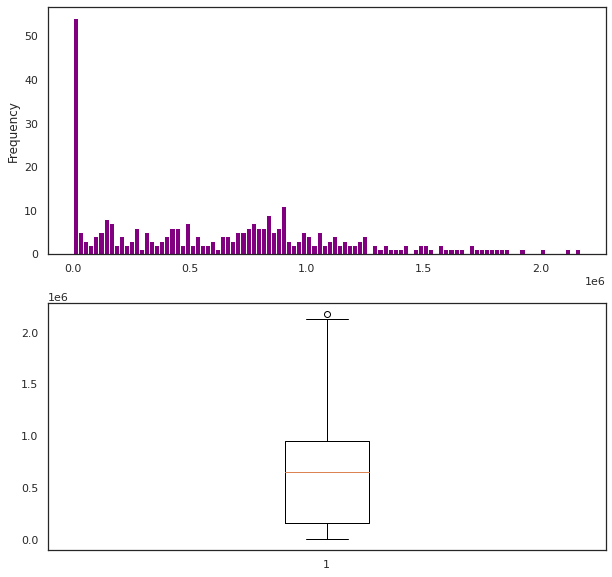

In [19]:
#Remove outlier
# dataset_a = dataset_new[(dataset_new["totalTestResultsIncrease"]>=0.0) & (dataset_new["totalTestResultsIncrease"]<=2.0)]

plt.figure(figsize=(10,10)).gca()
plt.subplot(2,1,1)
dataset['totalTestResultsIncrease'].plot(kind='hist', bins=100, color="purple")
plt.subplot(2,1,2)
plt.boxplot(dataset['totalTestResultsIncrease'])

In [20]:
out_zscore(dataset.totalTestResultsIncrease)
z=np.abs(stats.zscore(dataset.totalTestResultsIncrease))
# print(z)

Total number of outliers are 0


<h1>MISSING DATA</h1>

In [21]:
#cek data null
dataset.isnull().sum()

states                       0
positive                     0
negative                     0
hospitalizedCumulative      42
death                       19
hospitalized                42
deathIncrease                0
negativeIncrease             0
positiveIncrease             0
totalTestResultsIncrease     0
dtype: int64

In [22]:
#Replacing null with mean
dataset['hospitalizedCumulative']=dataset['hospitalizedCumulative'].fillna((dataset['hospitalizedCumulative'].mean()))
dataset['death']=dataset['death'].fillna((dataset['death'].mean()))
dataset['hospitalized']=dataset['hospitalized'].fillna((dataset['hospitalized'].mean()))

#Re-check
dataset.isnull().sum()

states                      0
positive                    0
negative                    0
hospitalizedCumulative      0
death                       0
hospitalized                0
deathIncrease               0
negativeIncrease            0
positiveIncrease            0
totalTestResultsIncrease    0
dtype: int64

<h1>SIMPLE LINEAR REGRESSION</h1>


In [23]:
#correlation dataset
dataset.corr()

,states,positive,negative,hospitalizedCumulative,death,hospitalized,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
states,1.000000,0.423699,0.396445,0.039739,0.349633,0.039739,0.535888,0.539665,0.412519,0.504598
positive,0.423699,1.000000,0.995025,0.880795,0.917168,0.880795,0.313663,0.933258,0.876241,0.958003
negative,0.396445,0.995025,1.000000,0.887479,0.916568,0.887479,0.259835,0.922785,0.846920,0.948506
hospitalizedCumulative,0.039739,0.880795,0.887479,1.000000,0.901574,1.000000,0.096226,0.816976,0.707846,0.834871
death,0.349633,0.917168,0.916568,0.901574,1.000000,0.901574,0.229274,0.903176,0.742917,0.904749
hospitalized,0.039739,0.880795,0.887479,1.000000,0.901574,1.000000,0.096226,0.816976,0.707846,0.834871
deathIncrease,0.535888,0.313663,0.259835,0.096226,0.229274,0.096226,1.000000,0.339395,0.486787,0.354941
negativeIncrease,0.539665,0.933258,0.922785,0.816976,0.903176,0.816976,0.339395,1.000000,0.854741,0.991732
positiveIncrease,0.412519,0.876241,0.846920,0.707846,0.742917,0.707846,0.486787,0.854741,1.000000,0.894172
totalTestResultsIncrease,0.504598,0.958003,0.948506,0.834871,0.904749,0.834871,0.354941,0.991732,0.894172,1.000000


Coef linear regression           :  [[0.129749]]
Intercept linear regression      :  [124319.47793274]
Accuracy                         : 0.9188440917118461


Text(0.5, 1.0, 'Positive vs Total Test Results Increase')

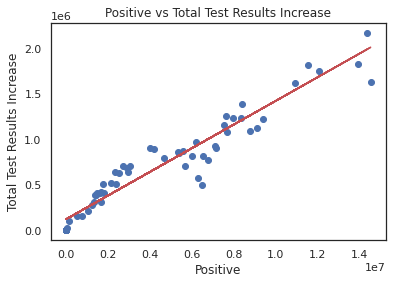

In [24]:
#x= positive and y = totalTestResultsIncrease
x = dataset['positive'].values.reshape(-1,1)
y = dataset['totalTestResultsIncrease'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#training data
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
positive_lin_reg_coef_= lin_reg.coef_
positive_lin_reg_intercept_= lin_reg.intercept_
print("Coef linear regression           : ",positive_lin_reg_coef_)
print("Intercept linear regression      : ",positive_lin_reg_intercept_)

#acuracy data
accuracy_positive_single = lin_reg.score(x_test, y_test)
print("Accuracy                         :",accuracy_positive_single)

#predict data
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Positive')
plt.ylabel('Total Test Results Increase')
plt.title('Positive vs Total Test Results Increase')

Coef linear regression           :  [[10.21499356]]
Intercept linear regression      :  [165919.73727923]
Accuracy                         : 0.76061087750381


Text(0.5, 1.0, 'Positive Increase vs Total Test Results Increase')

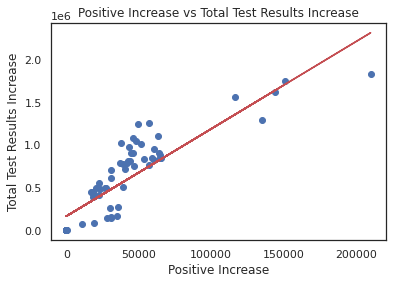

In [25]:
#x= positiveIncrease and y = totalTestResultsIncrease
x = dataset['positiveIncrease'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#training data
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
positiveIncrease_lin_reg_coef_= lin_reg.coef_
positiveIncrease_lin_reg_intercept_= lin_reg.intercept_
print("Coef linear regression           : ",positiveIncrease_lin_reg_coef_)
print("Intercept linear regression      : ",positiveIncrease_lin_reg_intercept_)

#acuracy data
accuracy_positiveIncrease_single = lin_reg.score(x_test, y_test)
print("Accuracy                         :",accuracy_positiveIncrease_single)

#predict data
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Positive Increase')
plt.ylabel('Total Test Results Increase')
plt.title('Positive Increase vs Total Test Results Increase')

Coef linear regression           :  [[5.88841686]]
Intercept linear regression      :  [-98740.46555768]
Accuracy                         :  0.8947516270361062


Text(0.5, 1.0, 'Death vs Total Test Results Increase')

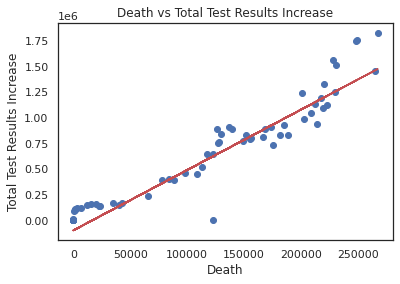

In [26]:
#x= death and y = totalTestResultsIncrease
x = dataset['death'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#training data
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
death_lin_reg_coef_= lin_reg.coef_
death_lin_reg_intercept_= lin_reg.intercept_
print("Coef linear regression           : ",death_lin_reg_coef_)
print("Intercept linear regression      : ",death_lin_reg_intercept_)

#acuracy data
accuracy_death_single = lin_reg.score(x_test, y_test)
print("Accuracy                         : ",accuracy_death_single)

#predict data
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Death')
plt.ylabel('Total Test Results Increase')
plt.title('Death vs Total Test Results Increase')

Coef linear regression           :  [[0.0101877]]
Intercept linear regression      :  [160010.43531352]
Accuracy                         : 0.8711227654647348


Text(0.5, 1.0, 'Negative vs Total Test Results Increase')

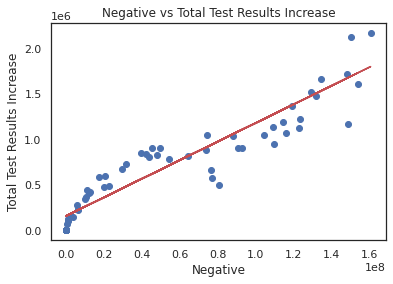

In [27]:
#x= negative and y = totalTestResultsIncrease
x = dataset['negative'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#training data
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
negative_lin_reg_coef_= lin_reg.coef_
negative_lin_reg_intercept_= lin_reg.intercept_
print("Coef linear regression           : ",negative_lin_reg_coef_)
print("Intercept linear regression      : ",negative_lin_reg_intercept_)

#acuracy data
accuracy_negative_single = lin_reg.score(x_test, y_test)
print("Accuracy                         :",accuracy_negative_single)

#predict data
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Negative')
plt.ylabel('Total Test Results Increase')
plt.title('Negative vs Total Test Results Increase')

Coef linear regression           :  [[1.33018298]]
Intercept linear regression      :  [-36531.94017417]
Accuracy                         : 0.9900129299694947


Text(0.5, 1.0, 'Negative Increase vs Total Test Results Increase')

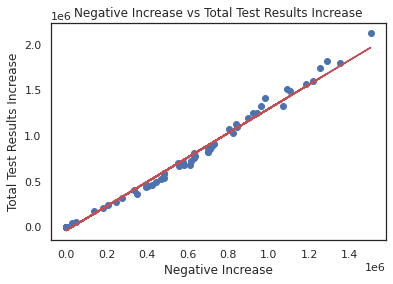

In [28]:
#x= negativeIncrease and y = totalTestResultsIncrease
x = dataset['negativeIncrease'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#training data
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
negativeIncrease_lin_reg_coef_= lin_reg.coef_
negativeIncrease_lin_reg_intercept_= lin_reg.intercept_
print("Coef linear regression           : ",negativeIncrease_lin_reg_coef_)
print("Intercept linear regression      : ",negativeIncrease_lin_reg_intercept_)

#acuracy data
accuracy_negativeIncrease_single = lin_reg.score(x_test, y_test)
print("Accuracy                         :",accuracy_negativeIncrease_single)

#predict data
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Negative Increase')
plt.ylabel('Total Test Results Increase')
plt.title('Negative Increase vs Total Test Results Increase')

Coef linear regression           :  [[227.35775435]]
Intercept linear regression      :  [432150.28265881]
Accuracy                         : 0.22766714099891472


Text(0.5, 1.0, 'Death Increase vs Total Test Results Increase')

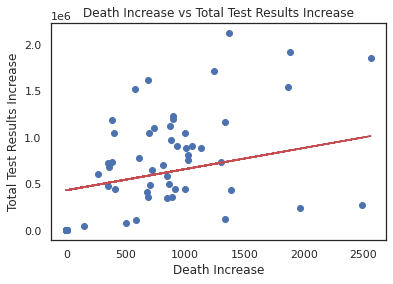

In [29]:
#x= deathIncrease and y = totalTestResultsIncrease
x = dataset['deathIncrease'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#training data
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
deathIncrease_lin_reg_coef_= lin_reg.coef_
deathIncrease_lin_reg_intercept_= lin_reg.intercept_
print("Coef linear regression           : ",deathIncrease_lin_reg_coef_)
print("Intercept linear regression      : ",deathIncrease_lin_reg_intercept_)

#acuracy data
accuracy_deathIncrease_single = lin_reg.score(x_test, y_test)
print("Accuracy                         :",accuracy_deathIncrease_single)

#predict data
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Death Increase')
plt.ylabel('Total Test Results Increase')
plt.title('Death Increase vs Total Test Results Increase')

Coef linear regression           :  [[2.89766968]]
Intercept linear regression      :  [-160785.12618189]
Accuracy                         : 0.6773945805776644


Text(0.5, 1.0, 'Hospitalized vs Total Test Results Increase')

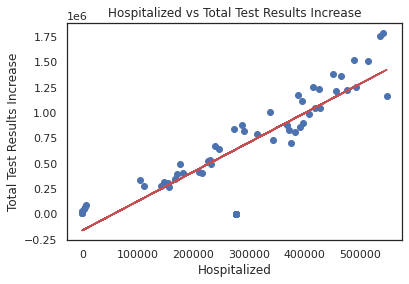

In [30]:
#x= hospitalized and y = totalTestResultsIncrease
x = dataset['hospitalized'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#training data
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
hospitalized_lin_reg_coef_= lin_reg.coef_
hospitalized_lin_reg_intercept_= lin_reg.intercept_
print("Coef linear regression           : ",hospitalized_lin_reg_coef_)
print("Intercept linear regression      : ",hospitalized_lin_reg_intercept_)

#acuracy data
accuracy_hospitalized_single = lin_reg.score(x_test, y_test)
print("Accuracy                         :",accuracy_hospitalized_single)

#predict data
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Hospitalized')
plt.ylabel('Total Test Results Increase')
plt.title('Hospitalized vs Total Test Results Increase')

Coef linear regression           :  [[2.84274382]]
Intercept linear regression      :  [-152578.85005674]
Accuracy                         : 0.6961426380597981


Text(0.5, 1.0, 'Hospitalized Cumulative vs Total Test Results Increase')

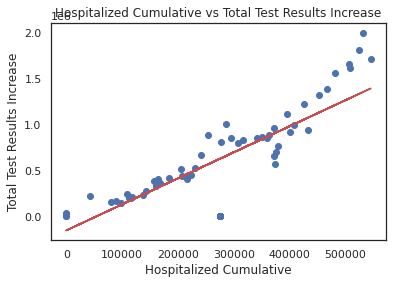

In [31]:
#x= hospitalizedCumulative and y = totalTestResultsIncrease
x = dataset['hospitalizedCumulative'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#training data
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
hospitalizedCumulative_lin_reg_coef_= lin_reg.coef_
hospitalizedCumulative_lin_reg_intercept_= lin_reg.intercept_
print("Coef linear regression           : ",hospitalizedCumulative_lin_reg_coef_)
print("Intercept linear regression      : ",hospitalizedCumulative_lin_reg_intercept_)

#acuracy data
accuracy_hospitalizedCumulative_single = lin_reg.score(x_test, y_test)
print("Accuracy                         :",accuracy_hospitalizedCumulative_single)

#predict data
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Hospitalized Cumulative')
plt.ylabel('Total Test Results Increase')
plt.title('Hospitalized Cumulative vs Total Test Results Increase')

<h1>ANALYZE SIMPLE LINEAR REGRESSION </h1>

In [32]:
print("Positive")
print('a. Positive linear regression coef                           :',positive_lin_reg_coef_)
print('b. Positive linear regression intercept                      :',positive_lin_reg_intercept_)
print('c. Positive linear regression correlation                    :',accuracy_positive_single)
print("\nPositive Increase")
print('a. Positive Increase linear regression coef                  :',positiveIncrease_lin_reg_coef_)
print('b. Positive Increase linear regression intercept             :',positiveIncrease_lin_reg_intercept_)
print('c. Positive linear regression correlation                    :',accuracy_positiveIncrease_single)
print("\nDeath")
print('a. Death linear regression coef                              :',death_lin_reg_coef_)
print('b. Death Increase linear regression intercept                :',death_lin_reg_intercept_)
print('c. Death linear regression correlation                       :',accuracy_death_single)
print("\nNegative")
print('a. Negative linear regression coef                           :',negative_lin_reg_coef_)
print('b. Negative linear regression intercept                      :',negative_lin_reg_intercept_)
print('c. Negative linear regression correlation                    :',accuracy_negative_single)
print("\nNegative Increase")
print('a. Negative Increase linear regression coef                  :',negativeIncrease_lin_reg_coef_)
print('b. Negative Increase linear regression intercept             :',negativeIncrease_lin_reg_intercept_)
print('c. Negative Increase linear regression correlation           :',accuracy_negativeIncrease_single)
print("\nDeath Increase")
print('a. Death Increase linear regression coef                     :',deathIncrease_lin_reg_coef_)
print('b. Death Increase linear regression intercept                :',deathIncrease_lin_reg_intercept_)
print('c. Death Increase linear regression correlation              :',accuracy_deathIncrease_single)
print("\nHospitalized")
print('a. Hospitalized linear regression coef                       :',hospitalized_lin_reg_coef_)
print('b. Hospitalized linear regression intercept                  :',hospitalized_lin_reg_intercept_)
print('c. Hospitalized linear regression correlation                :',accuracy_hospitalized_single)
print("\nHospitalized Cumulative")
print('a. Hospitalized Cumulative linear regression coef            :',hospitalizedCumulative_lin_reg_coef_)
print('b. Hospitalized Cumulative linear regression intercept       :',hospitalizedCumulative_lin_reg_intercept_)
print('c. Hospitalized Cumulative linear regression correlation     :',accuracy_hospitalizedCumulative_single)

Positive
a. Positive linear regression coef                           : [[0.129749]]
b. Positive linear regression intercept                      : [124319.47793274]
c. Positive linear regression correlation                    : 0.9188440917118461

Positive Increase
a. Positive Increase linear regression coef                  : [[10.21499356]]
b. Positive Increase linear regression intercept             : [165919.73727923]
c. Positive linear regression correlation                    : 0.76061087750381

Death
a. Death linear regression coef                              : [[5.88841686]]
b. Death Increase linear regression intercept                : [-98740.46555768]
c. Death linear regression correlation                       : 0.8947516270361062

Negative
a. Negative linear regression coef                           : [[0.0101877]]
b. Negative linear regression intercept                      : [160010.43531352]
c. Negative linear regression correlation                    : 0.871122765464

$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$
​
<b>Linear function:</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line0, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

<h1> MULTIPLE LINEAR REGRESSION </h1>

In [33]:
#training model
x_data = dataset[['states',
                  'positive',
                  'negative',
                  'hospitalizedCumulative',
                  'death',
                  'hospitalized',
                  'deathIncrease',
                  'negativeIncrease', 
                  'positiveIncrease',
                  ]]

y_data = dataset[['totalTestResultsIncrease']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)
model = lin_reg.fit(x_train, y_train)

In [34]:
#get coef and intercept
multi_lin_reg_coef_       = lin_reg.coef_
multi_lin_reg_intercept_  = lin_reg.intercept_
print(multi_lin_reg_coef_)
print(multi_lin_reg_intercept_)

[[-1.43849251e+03 -2.42520060e-02  3.95351318e-03 -1.03899346e-01
  -1.99364039e-02 -1.03899348e-01  1.77606316e+01  1.06478787e+00
   1.34996603e+00]]
[63974.31198266]


In [35]:
#find rmse
rmse = np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
rmse

32317.75163001252

In [36]:
#accuracy model of data
accuracy_multi_reg_lin = model.score(x_train,y_train)
print(accuracy_multi_reg_lin)

0.9961851756583405


In [37]:
#accuracy cross val model of data
cross_multi_reg_lin = cross_val_score(model, x_train,  y_train, cv= 10, scoring="r2").mean()
print(cross_multi_reg_lin)

0.9957268035595854


In [38]:
y_head = model.predict(x_test)
y_head[0:5]

array([[1279902.04550434],
       [ 221179.88155409],
       [  -2336.45947376],
       [ 761568.86641777],
       [ 961995.43639252]])

In [39]:
y_test_1 =np.array(range(0,len(y_test)))

Test r2 error =  0.9948643895022102


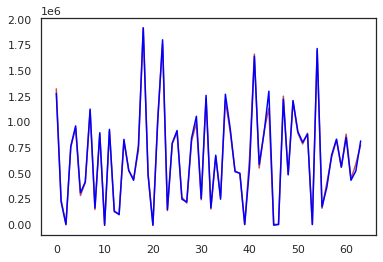

In [40]:
# r2 value: 
r2_degeri = r2_score(y_test, y_head)
print("Test r2 error = ",r2_degeri) 

plt.plot(y_test_1,y_test,color="r")
plt.plot(y_test_1,y_head,color="blue")
plt.show()

<h1>ANALYZE MULTIPLE LINEAR REGRESSION </h1>

In [41]:
print('a. Multi linear regression coef                   :\n',multi_lin_reg_coef_)
print('b. Multi linear regression intercept              :',multi_lin_reg_intercept_)
print('c. Multi linear regression accuracy               :',accuracy_multi_reg_lin)
print('d. Multi linear regression cross                  :',cross_multi_reg_lin)
print('e. Multi linear regression r2 error               :',r2_degeri)

a. Multi linear regression coef                   :
 [[-1.43849251e+03 -2.42520060e-02  3.95351318e-03 -1.03899346e-01
  -1.99364039e-02 -1.03899348e-01  1.77606316e+01  1.06478787e+00
   1.34996603e+00]]
b. Multi linear regression intercept              : [63974.31198266]
c. Multi linear regression accuracy               : 0.9961851756583405
d. Multi linear regression cross                  : 0.9957268035595854
e. Multi linear regression r2 error               : 0.9948643895022102


Multiple linear regression is a model that can capture the a linear relationship between multiple variables/features – assuming that there is one. The general formula for multiple linear regression looks like the following:

$$
y
=
β
0
+
β
1
x
1
+
β
2
x
2
+
.
.
.
+
β
i
x
i
+
ε
$$
​
<b>Linear function:</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>β
0
 is known as the intercept</li>
    <li>β
1
 to 
β
i
 are known as coefficients</li>
 <li>x
1
 to 
x
i
 are the features of our dataset</li>
 <li>ε
 are the residual terms</li>
    
</ul>
We can also represent the formula for linear regression in vector notation. When representing the formula in vector notation, we have the advantage of using some operations from linear algebra, which in turn makes it easier to code.

<h1>Binning</h1>

In [42]:
#check info dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 0 to 319
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   states                    319 non-null    int64  
 1   positive                  319 non-null    int64  
 2   negative                  319 non-null    int64  
 3   hospitalizedCumulative    319 non-null    float64
 4   death                     319 non-null    float64
 5   hospitalized              319 non-null    float64
 6   deathIncrease             319 non-null    int64  
 7   negativeIncrease          319 non-null    int64  
 8   positiveIncrease          319 non-null    int64  
 9   totalTestResultsIncrease  319 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 37.4 KB


In [43]:
#binning dataset['totalTestResultsIncrease'] into 4 value
binning = np.linspace(min(dataset['totalTestResultsIncrease']), max(dataset['totalTestResultsIncrease']),4)
binning

array([      0.,  723252., 1446504., 2169756.])

In [44]:
#create label
group_names = ['Results Increase Level 0', 'Results Increase Level 1','Results Increase Level 2' ]

In [45]:
#create new column to classify value binning into label
dataset['Level Test Results Increase'] = pd.cut(dataset['totalTestResultsIncrease'], binning, labels=group_names, include_lowest=True )
dataset.head(5)

,states,positive,negative,hospitalizedCumulative,death,hospitalized,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,Level Test Results Increase
0,56,14534035,161986294,585676.0,273374.0,585676.0,1138,1172590,176771,1634532,Results Increase Level 2
1,56,14357264,160813704,583420.0,272236.0,583420.0,2445,1526995,211073,2169756,Results Increase Level 2
2,56,14146191,159286709,580104.0,269791.0,580104.0,2563,1260657,224831,1854869,Results Increase Level 2
3,56,13921360,158026052,575452.0,267228.0,575452.0,2706,1238465,210204,1828230,Results Increase Level 2
4,56,13711156,156787587,570121.0,264522.0,570121.0,2733,982032,195796,1459202,Results Increase Level 2


<h1>LOGISTIC REGRESSION</h1>

In [46]:
#convert type string into int
new_data ={
    "Level Test Results Increase" : {
        "Results Increase Level 0"    : 1,
        "Results Increase Level 1"    : 2,
        "Results Increase Level 2"    : 3
    }  
  }
dataset = dataset.replace(new_data)
dataset.head()

,states,positive,negative,hospitalizedCumulative,death,hospitalized,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,Level Test Results Increase
0,56,14534035,161986294,585676.0,273374.0,585676.0,1138,1172590,176771,1634532,3
1,56,14357264,160813704,583420.0,272236.0,583420.0,2445,1526995,211073,2169756,3
2,56,14146191,159286709,580104.0,269791.0,580104.0,2563,1260657,224831,1854869,3
3,56,13921360,158026052,575452.0,267228.0,575452.0,2706,1238465,210204,1828230,3
4,56,13711156,156787587,570121.0,264522.0,570121.0,2733,982032,195796,1459202,3


In [47]:
#divide atribut and label
atribut = x_data
label = dataset["Level Test Results Increase"]

In [48]:
#training model
x_train, x_test, y_train, y_test = train_test_split(atribut, label, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_train)

In [49]:
#get coef
logistic_reg_coef = log_reg.coef_
print(logistic_reg_coef)

[[ 6.29690071e-08  1.40072539e-06 -6.85390656e-07  7.98254261e-05
   2.34717723e-05  7.98254261e-05  1.59343843e-07 -2.35259703e-05
  -2.51754385e-06]
 [-1.52661847e-08  1.07383427e-06 -1.77827677e-07  9.28135857e-06
   1.89559996e-05  9.28135857e-06  2.19749658e-08  9.65451141e-06
  -3.08975421e-05]
 [-4.77028224e-08 -2.47455966e-06  8.63218332e-07 -8.91067847e-05
  -4.24277718e-05 -8.91067847e-05 -1.81318809e-07  1.38714589e-05
   3.34150860e-05]]


In [50]:
#get intercept
log_reg_intercept_  = log_reg.intercept_
print(log_reg_intercept_)

[ 1.39702030e-09 -4.51744909e-10 -9.45275390e-10]


In [51]:
#accuracy model of data
logistic_reg_score =log_reg.score(x_test,y_test)
print(logistic_reg_score)

0.921875


In [52]:
#find mean square error
Mean_Squared_Error = mean_squared_error(y_train, log_reg_pred)
print(Mean_Squared_Error)

0.3686274509803922


In [53]:
#find mean absolute error
Mean_Absolute_Error = mean_absolute_error(y_train, log_reg_pred)
print(Mean_Absolute_Error)

0.21176470588235294


In [54]:
#find R2 error
R2_Score = r2_score(y_train, log_reg_pred)
print(R2_Score)

0.10971623830040123


In [55]:
dataset["Level Test Results Increase"].value_counts()

1    176
2    118
3     25
Name: Level Test Results Increase, dtype: int64

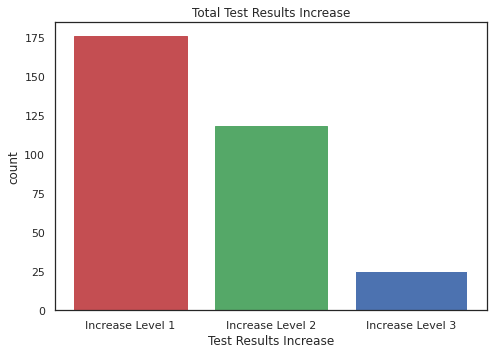

In [56]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
group_names = ['Increase Level 1','Increase Level 2','Increase Level 3']

# set x/y labels and plot title
ax.set_title("Total Test Results Increase")
ax.set_xlabel("Test Results Increase")
ax.set_ylabel("count")
tmp = ax.bar(group_names, dataset["Level Test Results Increase"].value_counts())
tmp[0].set_color('r')
tmp[1].set_color('g')
plt.show()

<h1>ANALYZE LOGISTIC REGRESSION</h1>

In [57]:
print('a. Logistic regression coef                       :\n',logistic_reg_coef)
print('b. Logistic regression intercept                  :',log_reg_intercept_)
print('c. Logistic regression accuracy                   :',logistic_reg_score)
print('d. Logistic regression Mean Square Error          :',Mean_Squared_Error)
print('e. Logistic regression Mean Absolute Error        :',Mean_Absolute_Error)
print('f. Logistic regression r2 error                   :',R2_Score)

a. Logistic regression coef                       :
 [[ 6.29690071e-08  1.40072539e-06 -6.85390656e-07  7.98254261e-05
   2.34717723e-05  7.98254261e-05  1.59343843e-07 -2.35259703e-05
  -2.51754385e-06]
 [-1.52661847e-08  1.07383427e-06 -1.77827677e-07  9.28135857e-06
   1.89559996e-05  9.28135857e-06  2.19749658e-08  9.65451141e-06
  -3.08975421e-05]
 [-4.77028224e-08 -2.47455966e-06  8.63218332e-07 -8.91067847e-05
  -4.24277718e-05 -8.91067847e-05 -1.81318809e-07  1.38714589e-05
   3.34150860e-05]]
b. Logistic regression intercept                  : [ 1.39702030e-09 -4.51744909e-10 -9.45275390e-10]
c. Logistic regression accuracy                   : 0.921875
d. Logistic regression Mean Square Error          : 0.3686274509803922
e. Logistic regression Mean Absolute Error        : 0.21176470588235294
f. Logistic regression r2 error                   : 0.10971623830040123
